In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

# SELLER P&L ANALYSIS

🎯 The goal of this exercise is to compute the P&L associated to each seller  

For each `seller_id` we need three items:  

- The **revenue**:
 - 10% fee on sales
 - 80 BRL per month on Olist


- The **cost**:
 - Review cost according to `{1: 100, 2: 50, 3: 40, 4: 0, 5: 0}` with review score as key and cost in BRL as value


- The **profit** made by Olist (before IT costs)

💡 Let's not start from scratch  
❓ Import your seller training set and investigate what you already have.


In [2]:
from olist.seller import Seller
sellers = Seller().get_training_data()
sellers.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,share_of_one_stars,share_of_five_stars,review_score
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000,218.70,0.333333,0.333333,3.00
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025,11703.07,0.050000,0.725000,4.55
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000,158.00,0.000000,1.000000,5.00
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000,79.99,0.000000,1.000000,5.00
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000,167.99,1.000000,0.000000,1.00


In [5]:
sellers.months_on_olist.map(lambda months: max(1, months))

0        4.0
1       14.0
2        1.0
3        1.0
4        1.0
        ... 
2962     1.0
2963    14.0
2964     5.0
2965     4.0
2966     1.0
Name: months_on_olist, Length: 2967, dtype: float64

In [7]:
sellers['commission_revenue'] = sellers.sales * 0.1
sellers['monthly_subscription_revenue'] = sellers.months_on_olist.map(lambda months: max(1, months)) * 80
sellers['revenue'] = sellers.commission_revenue + sellers.monthly_subscription_revenue
sellers.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,share_of_one_stars,share_of_five_stars,review_score,commission_revenue,monthly_subscription_revenue,revenue
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000,218.70,0.333333,0.333333,3.00,21.870,320.0,341.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025,11703.07,0.050000,0.725000,4.55,1170.307,1120.0,2290.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000,158.00,0.000000,1.000000,5.00,15.800,80.0,95.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000,79.99,0.000000,1.000000,5.00,7.999,80.0,87.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000,167.99,1.000000,0.000000,1.00,16.799,80.0,96.799


❓ What is missing?  
Write down a strategy to get your missing columns  
Re-use as much of what has already been coded in `seller.py` as possible

In [ ]:
# Your pseudo-code

❓ Make a copy of `seller.py`, rename it `seller_updated.py` and update it accordingly

In [20]:
from olist.seller_updated import Seller
sellers = Seller().get_training_data()
sellers.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000,218.70,0.333333,0.333333,3.00,140
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025,11703.07,0.050000,0.725000,4.55,240
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000,158.00,0.000000,1.000000,5.00,0
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000,79.99,0.000000,1.000000,5.00,0
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000,167.99,1.000000,0.000000,1.00,100


<!-- ❓ Compute seller profits -->

In [22]:
sellers['commission_revenue'] = sellers.sales * 0.1
sellers['monthly_subscription_revenue'] = sellers.months_on_olist.map(lambda months: max(1, months)) * 80
sellers['revenue'] = sellers.commission_revenue + sellers.monthly_subscription_revenue
sellers.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,commission_revenue,monthly_subscription_revenue,revenue
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000,218.70,0.333333,0.333333,3.00,140,21.870,320.0,341.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025,11703.07,0.050000,0.725000,4.55,240,1170.307,1120.0,2290.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000,158.00,0.000000,1.000000,5.00,0,15.800,80.0,95.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000,79.99,0.000000,1.000000,5.00,0,7.999,80.0,87.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000,167.99,1.000000,0.000000,1.00,100,16.799,80.0,96.799


In [24]:
sellers['profits'] = sellers.revenue - sellers.cost_of_reviews

In [25]:
olist_total_profits_before_IT_costs = sellers.profits.sum()
olist_total_profits_before_IT_costs

1217368.443999999

❓ Sort sellers by profit, and analyse their profitability: conclude on a possible strategy for Olist!

In [40]:
sorted_sellers = sellers.sort_values('profits', ignore_index=True)

<AxesSubplot:>

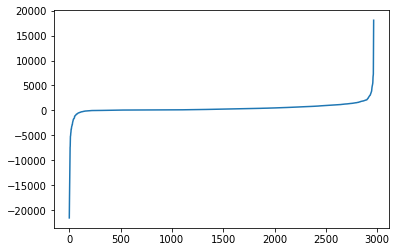

In [41]:
sorted_sellers.profits.plot()

In [42]:
sorted_sellers[['n_orders', 'profits']]

,n_orders,profits
0,1854,-21519.517
1,1806,-17752.708
2,1706,-17581.158
3,1146,-15542.248
4,943,-12886.431
...,...,...
2962,521,7071.119
2963,166,7288.455
2964,585,14494.203
2965,336,14623.187


## IT Costs

In [33]:
from olist.order import Order
orders = Order().get_training_data()

In [51]:
total_number_of_orders = orders.order_id.count()
total_number_of_orders

96353

In [37]:
# total_IT_costs = alpha * np.sqrt(total_number_of_orders)

alpha = 500_000 / np.sqrt(total_number_of_orders)
alpha

1610.7842843183041

In [44]:
def total_IT_costs(total_number_of_orders):
    return alpha * np.sqrt(total_number_of_orders)

def cost_of_single_order(total_number_of_orders):
    return total_IT_costs(total_number_of_orders) / total_number_of_orders

total_number_of_orders = 50_000
print(f"==== {total_number_of_orders} orders ====")
print(f"Total IT Costs: BRL{total_IT_costs(total_number_of_orders):.2f}")
print(f"Cost of single order: BRL{cost_of_single_order(total_number_of_orders):.2f}")

total_number_of_orders = 96_353
print(f"==== {total_number_of_orders} orders ====")
print(f"Total IT Costs: BRL{total_IT_costs(total_number_of_orders):.2f}")
print(f"Cost of single order: BRL{cost_of_single_order(total_number_of_orders):.2f}")

total_number_of_orders = 120_000
print(f"==== {total_number_of_orders} orders ====")
print(f"Total IT Costs: BRL{total_IT_costs(total_number_of_orders):.2f}")
print(f"Cost of single order: BRL{cost_of_single_order(total_number_of_orders):.2f}")

==== 50000 orders ====
Total IT Costs: BRL360182.32
Cost of single order: BRL7.20
==== 96353 orders ====
Total IT Costs: BRL500000.00
Cost of single order: BRL5.19
==== 120000 orders ====
Total IT Costs: BRL557992.04
Cost of single order: BRL4.65


In [52]:
total_number_of_orders

96353

In [53]:
total_number_of_orders - sorted_sellers.n_orders.cumsum().to_frame()

,n_orders
0,94499
1,92693
2,90987
3,89841
4,88898
...,...
2962,-2043
2963,-2209
2964,-2794
2965,-3130


In [58]:
olist_total_profits_before_IT_costs - sorted_sellers.profits.cumsum()

0       1238887.961
1       1256640.669
2       1274221.827
3       1289764.075
4       1302650.506
           ...     
2962      54473.450
2963      47184.995
2964      32690.792
2965      18067.605
2966          0.000
Name: profits, Length: 2967, dtype: float64

<AxesSubplot:>

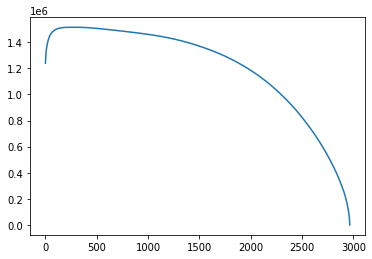

In [55]:
(olist_total_profits_before_IT_costs - sorted_sellers.profits.cumsum()).plot()